In [1]:
import pandas as pd

In [2]:
!wget  -O 'credit_scoring.csv' -q 'https://www.dropbox.com/scl/fi/5v1ora94vmn46i961ujha/credit_scoring.csv?rlkey=y34fmgqme1e73ca0qbvjpgh9x&dl=0'

Признаки клиентов банка:

- client_id - ID клиента (неотрицательное целое число)
- Age - возраст (вещественный)
- Income - месячный доход (вещественный)
- BalanceToCreditLimit - отношение баланса на кредитной карте к лимту по кредиту (вещественный)
- DIR - Debt-to-income Ratio (вещественный)
- NumLoans - число заемов и кредитных линий
- NumRealEstateLoans - число ипотек и заемов, связанных с недвижимостью (натуральное число)
- NumDependents - число членов семьи, которых содержит клиент, исключая самого клиента (натуральное число)
- Num30-59Delinquencies - число просрочек выплат по кредиту от 30 до 59 дней (натуральное число)
- Num60-89Delinquencies - число просрочек выплат по кредиту от 60 до 89 дней (натуральное число)
- Delinquent90 - Таргет, были ли просрочки выплат по кредиту более 90 дней (бинарный)


In [3]:
df = pd.read_csv("credit_scoring.csv")
df

,client_id,DIR,Age,NumLoans,NumRealEstateLoans,NumDependents,Num30-59Delinquencies,Num60-89Delinquencies,Income,BalanceToCreditLimit,Delinquent90
0,0,0.496289,49.1,13,0,0.0,2,0,5298.360639,0.387028,0
1,1,0.433567,48.0,9,2,2.0,1,0,6008.056256,0.234679,0
2,2,2206.731199,55.5,21,1,NaN,1,0,NaN,0.348227,0
3,3,886.132793,55.3,3,0,0.0,0,0,NaN,0.971930,0
4,4,0.000000,52.3,1,0,0.0,0,0,2504.613105,1.004350,0
...,...,...,...,...,...,...,...,...,...,...,...
74995,74995,0.169463,67.6,5,1,0.0,0,0,20129.654428,0.074689,0
74996,74996,2085.662215,43.2,1,1,0.0,0,0,NaN,1.005390,0
74997,74997,0.118935,23.0,4,0,0.0,2,0,2019.117329,0.384511,0
74998,74998,0.203414,46.3,14,2,0.0,0,0,16823.909642,0.524093,0


In [4]:
X = df.drop(['Delinquent90'], axis=1)
y = df['Delinquent90']

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   client_id              75000 non-null  int64  
 1   DIR                    75000 non-null  float64
 2   Age                    75000 non-null  float64
 3   NumLoans               75000 non-null  int64  
 4   NumRealEstateLoans     75000 non-null  int64  
 5   NumDependents          73084 non-null  float64
 6   Num30-59Delinquencies  75000 non-null  int64  
 7   Num60-89Delinquencies  75000 non-null  int64  
 8   Income                 60153 non-null  float64
 9   BalanceToCreditLimit   75000 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 5.7 MB


## 1 Решающие деревья и случайный лес

1.1 Обучите дерево решений максимальной глубины 3. Перед этим может понадобиться предобработать данные (пропуски). Также разделите данные на обучающие и тестовые (не забывайте, что обработка данных для теста и трейна должна происходить отдельно)

In [6]:
len(X)

75000

In [7]:
X.isnull().sum()

client_id                    0
DIR                          0
Age                          0
NumLoans                     0
NumRealEstateLoans           0
NumDependents             1916
Num30-59Delinquencies        0
Num60-89Delinquencies        0
Income                   14847
BalanceToCreditLimit         0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=12)

X_train['Income'] = X_train['Income'].mean()
X_test['Income'] = X_test['Income'].mean()


X_train['NumDependents'] = round(X_train['NumDependents'].mean())
X_test['NumDependents'] = round(X_test['NumDependents'].mean())


In [9]:
from sklearn.tree import DecisionTreeClassifier


tree_classifier = DecisionTreeClassifier(max_depth=3)
tree_classifier.fit(X_train, y_train)

accuracy = tree_classifier.score(X_test, y_test)
accuracy

0.9336444444444445

1.2 Визуализируйте решающее дерево

In [10]:
# ! pip install graphviz

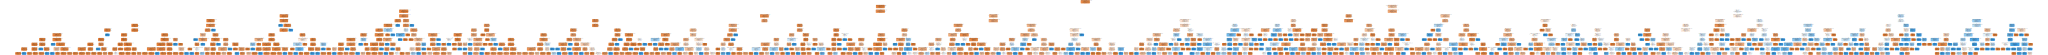

In [26]:
from sklearn.tree import export_graphviz
import graphviz

class_names = [str(label) for label in y.unique()]#TODO

graphviz.Source(export_graphviz(tree_classifier, out_file=None,
                           feature_names=X.columns,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True))


1.3 Рассмотрите, как изменение глубины дерева влияет на качество модели. Обучите решающее дерево с различной глубиной (от 1 до 11), оцените его точность и определите, когда начинается переобучение и какая глубина дерева является оптимальной





In [16]:
train_accs = []
test_accs = []

depths = list(range(1, 12))

for depth in depths:
    tree_classifier = DecisionTreeClassifier(max_depth=depth)
    tree_classifier.fit(X_train, y_train)
    test_acc = tree_classifier.score(X_test, y_test)
    train_acc = tree_classifier.score(X_train, y_train)
    
    train_accs.append(train_acc)
    test_accs.append(test_acc)
    print(f'Дерево с глубиной {depth} - точность: {round(test_acc, 3)}')

Дерево с глубиной 1 - точность: 0.933
Дерево с глубиной 2 - точность: 0.932
Дерево с глубиной 3 - точность: 0.934
Дерево с глубиной 4 - точность: 0.934
Дерево с глубиной 5 - точность: 0.934
Дерево с глубиной 6 - точность: 0.934
Дерево с глубиной 7 - точность: 0.934
Дерево с глубиной 8 - точность: 0.932
Дерево с глубиной 9 - точность: 0.931
Дерево с глубиной 10 - точность: 0.93
Дерево с глубиной 11 - точность: 0.928


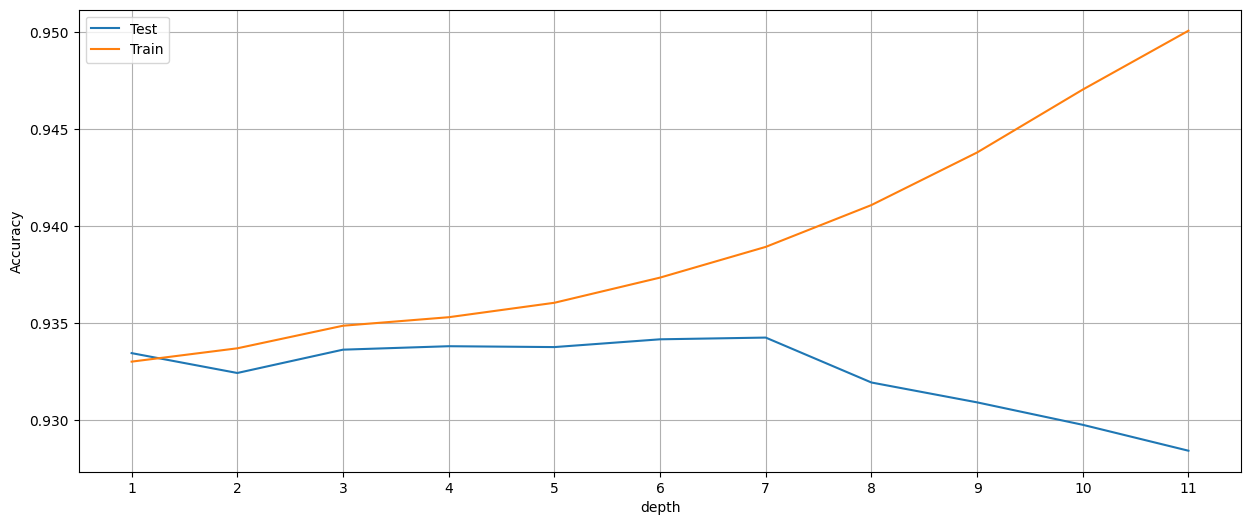

In [21]:
from matplotlib import pyplot as plt


plt.figure(figsize=(15, 6))
plt.plot(depths, test_accs, label='Test')
plt.plot(depths, train_accs, label='Train')

plt.xlabel('depth')
plt.ylabel('Accuracy')
plt.legend()
plt.xticks(depths)
plt.grid(True)
plt.show()

#### Вывод: переобучение начинается с глубины, равной 7

1.4 Настройте параметры дерева с помощью GridSearhCV, посмотрите на лучшую комбинацию параметров и среднее качество на 5-кратной кросс-валидации.

In [25]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [4, 5, 6],#TODO
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s

[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_leaf=1, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=4, max_features=auto, min_samples_le

/home/pishchulov/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
348 fits failed with the following error:
Traceback (most recent call last):
  File "/home/pishchulov/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pishchulov/.local/lib/python3.10/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/pishchulov/.local/lib/python3.10/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File 

1.5 Визуализируйте лучшее решающее дерево


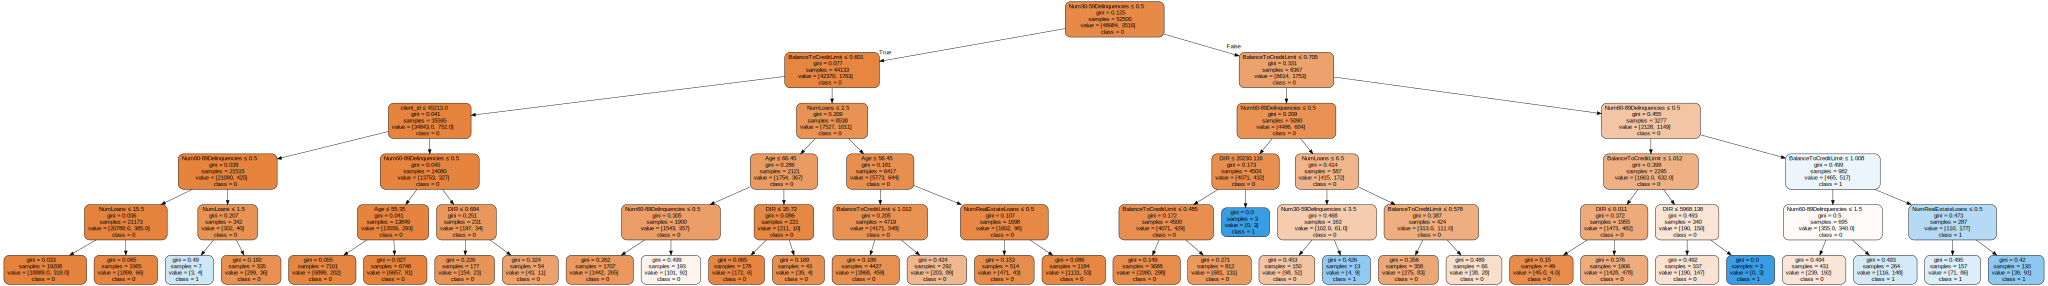

In [27]:

graphviz.Source(export_graphviz(grid_search.best_estimator_,
                                out_file=None,
                           feature_names=X.columns,
                           class_names=class_names,
                           filled=True, rounded=True,
                           special_characters=True))

1.6 Обучите Случайный лес (RandomForestClassifier), Настройте гиперпараметры случайного леса с помощью GridSearhCV, посмотрите на лучшую комбинацию параметров и среднее качество на 5-кратной кросс-валидации. Не забывайте про распараллеливание (n_jobs=-1).



In [28]:
from sklearn.ensemble import RandomForestClassifier


param_grid = {#TODO
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

print(rf_grid_search.best_params_)
print(rf_grid_search.best_score_)

KeyboardInterrupt: 

1.7 Посмотрите, как настроенный случайный лес оценивает важность признаков по их влиянию на целевой признак. Представьте результаты в наглядном виде с помощью DataFrame.



1.9 Выберите метрику и объясните ваш выбор метрики и сравните результаты решающего дерева и случайного леса

---



# 2 Бустинг xgboost

In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
!wget  -O 'telecom_churn.csv' -q 'https://www.dropbox.com/scl/fi/t8ickc6qfwdtfx6v40crd/telecom_churn.csv?rlkey=i7slagusqlb9pvsqdzvwac0x1&dl=0'

In [ ]:
df_telecom = pd.read_csv("telecom_churn.csv")
df_telecom

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


2.1 XGBoost поддерживает только числовые признаки. Поэтому текстовые признаки требуют предобработки

Штаты можно просто занумеровать, а признаки International plan (наличие международного роуминга), Voice mail plan (наличие голосовой почтыы) и целевой Churn сделать бинарными.




2.2 Разделим данные на обучающую и тестовую выборки в отношении 7:3.

2.3 Инициализируете параметры и обучите классификатор xgboost

2.4 Получите прогнозы для тестовой выборки и посчитайте долю правильных ответов алгоритма на тестовой выборке.

2.5 Важность признаков
Вычислите F score (не F мера!) для оценки важности признаков в Xgboost.